# Problema do caixeiro viajante

* Consiste na procura de um circuito que possua a menor distância, começando num vértice qualquer, visitando cada vértice precisamente uma vez e regressando ao vértice inicial

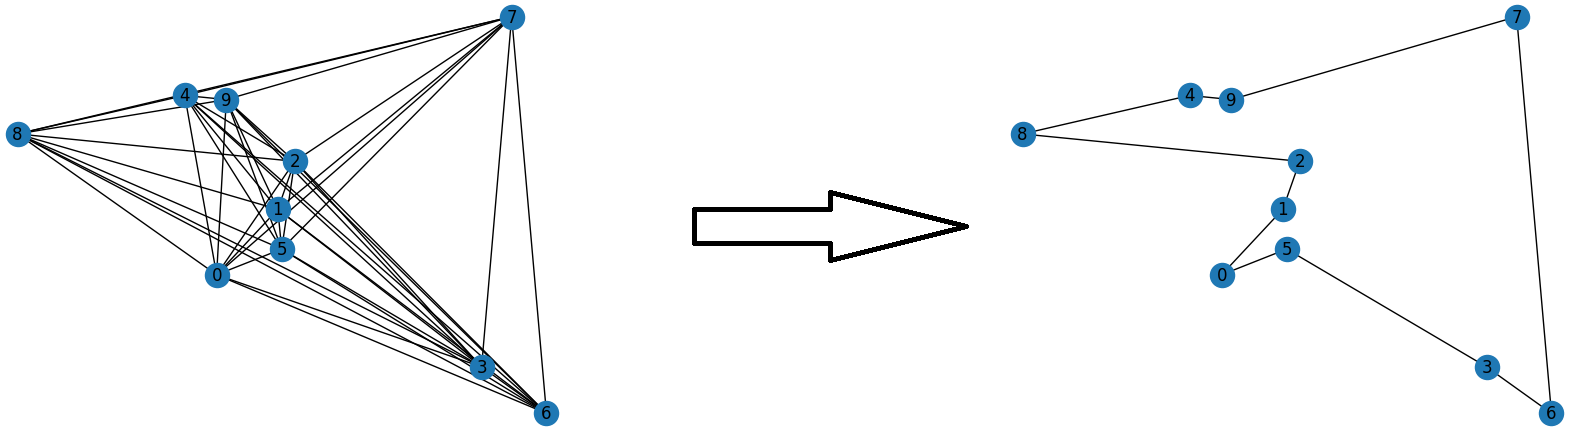

* Genes -> Vértices
* Indivíduos -> Circuitos
* População -> conjunto de circuitos

## Código

In [2]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
class EvolutionarySystem:
    def __init__(self, coordinates: list[tuple[float, float]], initial_pop: list[list[int]], num_gens=500, mutation_rate=0.05):
        self.coordinates = np.array(coordinates)
        self.population = np.array(initial_pop)
        self.num_gens = num_gens
        self.mutation_rate = mutation_rate
        self.distances: dict[tuple[int, int], float] = {}
        for i in range(len(self.coordinates)):
            for j in range(i + 1, len(self.coordinates)):
                self.distances[i, j] = np.linalg.norm(self.coordinates[i] - self.coordinates[j])

    # Retorna a distância entre dois vértices(genes)
    def get_genes_distance(self, gene1: int, gene2: int) -> float:
        if gene1 == gene2:
            return 0

        return self.distances[gene1, gene2] if gene1 < gene2 else self.distances[gene2, gene1]

    # Retorna a distância total de um percurso(indivíduo)
    def get_total_distance(self, individual: np.ndarray) -> float:
        sum = 0
        prev_gene = individual[0]
        for gene in individual[1:]:
            sum += self.get_genes_distance(prev_gene, gene)
            prev_gene = gene

        sum += self.get_genes_distance(prev_gene, individual[0])
        return sum

    # Retorna as distâncias da população atual
    def get_distances(self) -> np.ndarray:
        return np.array([self.get_total_distance(individual) for individual in self.population])

    # Retorna as aptidões da população atual(inverso das distâncias)
    def get_fitnesses(self) -> np.ndarray:
        return 1 / self.get_distances()

    # Realiza seleção por roleta
    def roulette_selection(self) -> np.ndarray:
        probs = self.fitnesses / self.fitnesses.sum()
        selected_individuals = np.random.choice(len(self.population), size=len(self.population), p=probs)
        self.population = self.population[selected_individuals]
        self.fitnesses = self.fitnesses[selected_individuals]

    # Realiza mutações aleatórias
    def mutate_population(self) -> np.ndarray:
        for i in range(len(self.population)):
            if np.random.rand() < self.mutation_rate:
                j, k = np.random.randint(0, len(self.population[i]), 2)
                self.population[i, j], self.population[i, k] = self.population[i, k], self.population[i, j]
                self.fitnesses[i] = 1 / self.get_total_distance(self.population[i])

    def run(self) -> tuple[list[int], float]:
        self.fitnesses = self.get_fitnesses()
        for _ in range(self.num_gens):
            self.roulette_selection()
            self.mutate_population()

        distances = self.get_distances()
        min_idx = np.argmin(distances)
        best_path = self.population[min_idx]
        best_distance = distances[min_idx]

        return best_path, best_distance

    def plot_graph(self, best_path: list[int]):
        G = nx.Graph()
        num_vertices = len(best_path)
        for i in range(num_vertices):
            G.add_node(i, pos=self.coordinates[i])

        prev_vertice = best_path[0]
        for vertice in best_path[1:]:
            G.add_edge(prev_vertice, vertice)
            prev_vertice = vertice
        G.add_edge(prev_vertice, best_path[0])

        pos = nx.get_node_attributes(G, 'pos')
        nx.draw(G, pos, with_labels=True)
        plt.show()

In [4]:
def generate_population(size: int, individuals_per_population: int):
    return np.array([np.random.permutation(individuals_per_population) for _ in range(size)])

### Testes para 10 vértices

In [5]:
num_vertices = 10
positions = np.random.rand(num_vertices, 2)

Melhor caminho: [8 3 1 4 7 2 6 5 0 9]
Melhor distância: 3.6870686916125806


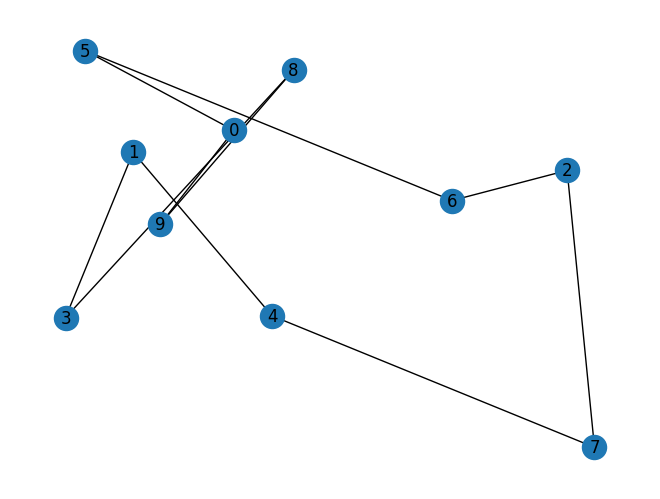

In [6]:
system = EvolutionarySystem(positions, generate_population(10, num_vertices), num_gens=100)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)

Melhor caminho: [1 3 9 4 7 2 6 8 0 5]
Melhor distância: 2.7819915589883824


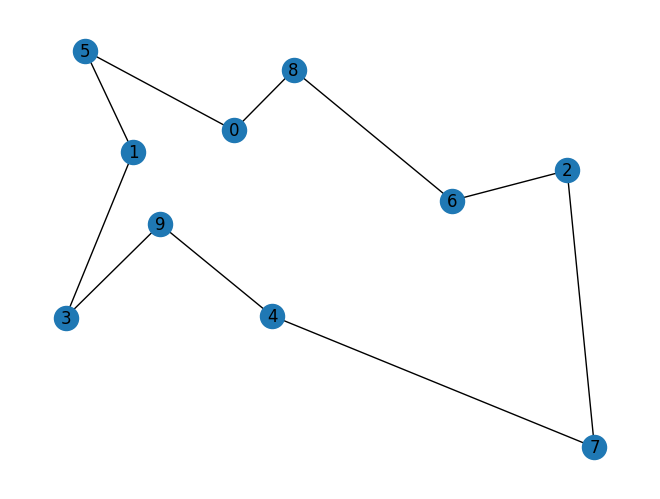

In [7]:
system = EvolutionarySystem(positions, generate_population(50, num_vertices), num_gens=500)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)

Melhor caminho: [6 8 0 5 1 9 3 4 7 2]
Melhor distância: 2.6821455634627047


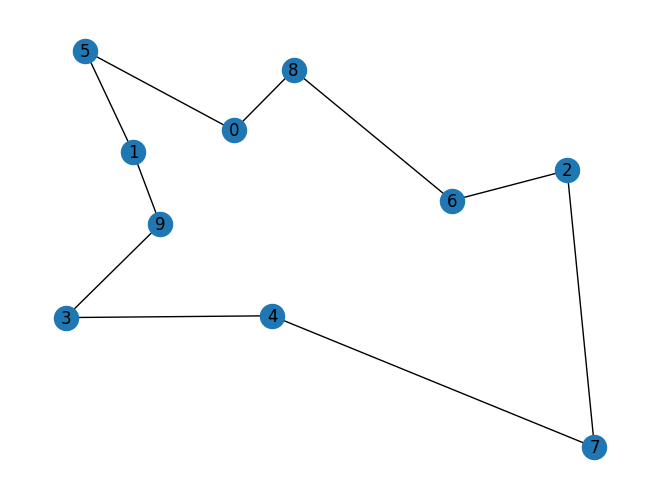

In [8]:
system = EvolutionarySystem(positions, generate_population(100, num_vertices), num_gens=1000)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)

### Testes para 30 vértices

In [9]:
num_vertices = 30
positions = np.random.rand(num_vertices, 2)

Melhor caminho: [ 2 22  7 17  4  1 16 14 13 25 18 11 10 20 21 23 29  0 19  8  9  3 24 12
 26 28  5 15  6 27]
Melhor distância: 15.417523468167046


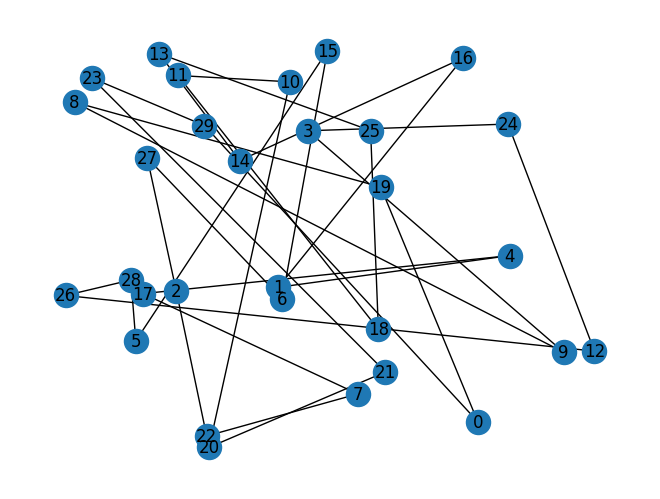

In [10]:
system = EvolutionarySystem(positions, generate_population(10, num_vertices), num_gens=100)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)

Melhor caminho: [21  0  4 10 13 25  5 22  7  9 12 28 20 24 18  6 11 19  3 29  8 23 15 16
 17 26 27 14  2  1]
Melhor distância: 10.672180384349183


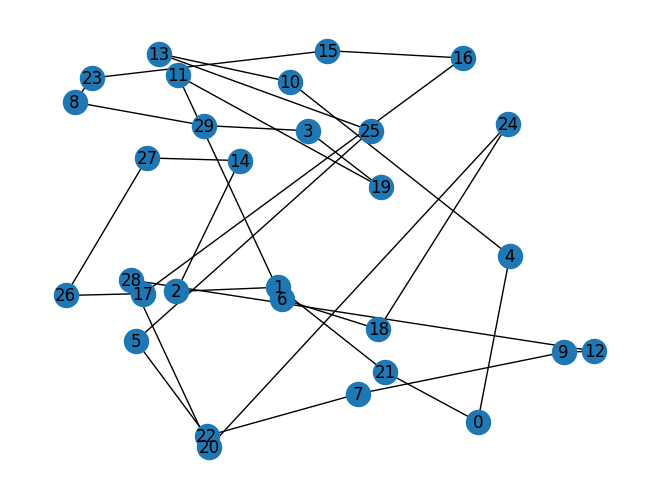

In [11]:
system = EvolutionarySystem(positions, generate_population(50, num_vertices), num_gens=500)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)

Melhor caminho: [ 5 20 22  1 15 16 19 25 17  2  6  4 24 29 11  3 28 26 13 23 27 12  9  7
 18  0 21 14 10  8]
Melhor distância: 9.54594562473501


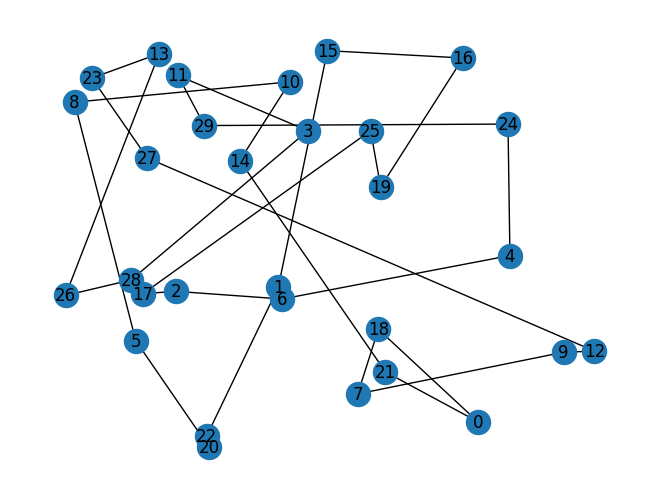

In [12]:
system = EvolutionarySystem(positions, generate_population(100, num_vertices), num_gens=1000)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)

Melhor caminho: [ 2  3 10 15 16 24 25 19  4 12  9  0 20 22  7 21 18  6  1 14 29 11 13 23
  8 27 28 26  5 17]
Melhor distância: 5.104270805007336


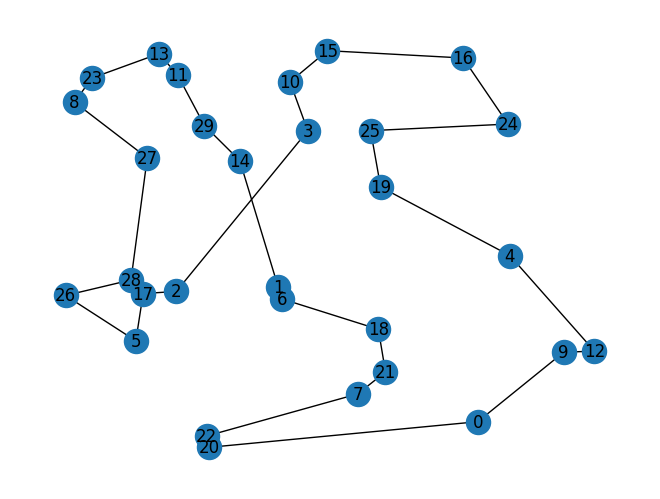

In [13]:
system = EvolutionarySystem(positions, generate_population(1000, num_vertices), num_gens=10000)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)

Melhor caminho: [ 9  0  7 20 22  5 26 28 17  2  1  6 21 18 14 29  3 25 24 16 15 10 11 13
 23  8 27 19  4 12]
Melhor distância: 5.071172221296176


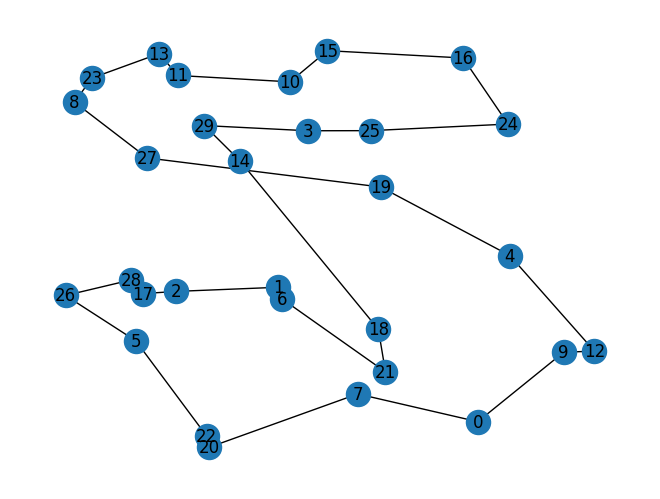

In [14]:
system = EvolutionarySystem(positions, generate_population(5000, num_vertices), num_gens=30000)
best_path, best_distance = system.run()
print(f"Melhor caminho: {best_path}")
print(f"Melhor distância: {best_distance}")
system.plot_graph(best_path)